In [0]:
import keras
from keras.layers import Dense, Conv2D, Activation, Dropout, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.datasets import mnist
from keras import backend as k
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [0]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [8]:
x_train1=x_train
x_train1.shape

(60000, 28, 28)

In [9]:
x_train=x_train/255
x_test=x_test/255
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_test.shape

(10000, 28, 28, 1)

In [10]:
y_train[0]

5

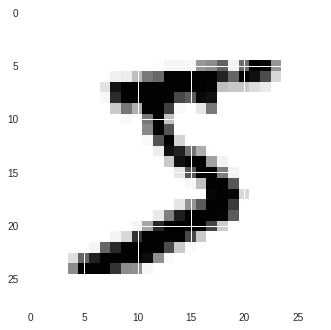

In [11]:
plt.imshow(x_train1[0])

In [12]:
model=Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
opt=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
model.fit(x_train,y_train,epochs=10,batch_size=256,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 231us/step - loss: 0.2744 - acc: 0.9118 - val_loss: 0.0486 - val_acc: 0.9843
Epoch 2/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.0681 - acc: 0.9795 - val_loss: 0.0278 - val_acc: 0.9906
Epoch 3/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.0492 - acc: 0.9851 - val_loss: 0.0271 - val_acc: 0.9907
Epoch 4/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.0385 - acc: 0.9878 - val_loss: 0.0246 - val_acc: 0.9920
Epoch 5/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.0347 - acc: 0.9891 - val_loss: 0.0209 - val_acc: 0.9933
Epoch 6/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.0308 - acc: 0.9904 - val_loss: 0.0187 - val_acc: 0.9931
Epoch 7/10
60000/60000 [==============================] - 9s 150us/step -

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
__________

In [20]:
pre=model.predict(x_test)
pre=np.argmax(pre,axis=1)
pre

array([7, 2, 1, ..., 4, 5, 6])

In [21]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [96]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      1.00       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.99      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [0]:
from PIL import Image

In [0]:
from google.colab import files

In [90]:
uploaded=files.upload()

Saving download8.jpg to download8.jpg


In [97]:
uploaded

{'download8.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xe1\x16\xdeExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x06\x00\x0b\x00\x02\x00\x00\x00&\x00\x00\x08b\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x011\x00\x02\x00\x00\x00&\x00\x00\x08\x88\x012\x00\x02\x00\x00\x00\x14\x00\x00\x08\xae\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x08\xc2\xea\x1c\x00\x07\x00\x00\x08\x0c\x00\x00\x00V\x00\x00\x11F\x1c\xea\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

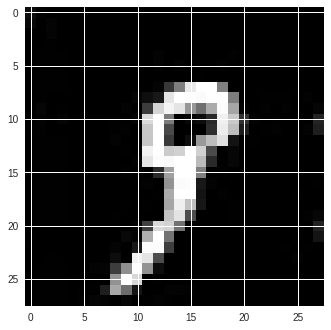

In [99]:
img=Image.open("download5.jpg")
img=img.resize((28,28))
plt.imshow(img)

In [101]:
pix_val = list(img.getdata())
len(pix_val)

784

In [102]:
pix_val=np.array(pix_val)
pix_val=pix_val[:,0].reshape(1,28,28,1)
pix_val=pix_val/255
pix_val

array([[[[0.05098039],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.03137255],
         [0.        ],
         [0.01568627],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         

In [105]:
l=model.predict(pix_val)
y_pred=np.argmax(l,axis=1)
y_pred


array([9])

In [0]:
from keras.preprocessing import image

In [0]:
img=image.load_img("download1.jpg",target_size=(28,28))
x=image.img_to_array(img)
x=x/255

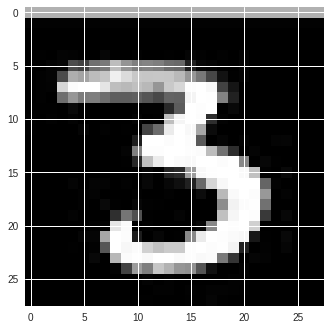

In [121]:
plt.imshow(img)

In [116]:
x.shape

(28, 28, 3)

In [117]:
x=x[:,:,0].reshape(1,28,28,1)
x.shape

(1, 28, 28, 1)

In [120]:
l=model.predict(x)
l=np.argmax(l,axis=1)
l

array([3])